<a href="https://colab.research.google.com/github/Ferhadaghayev/Classification-ML/blob/main/Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False)

In [29]:
X,y=mnist.data,mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
#y
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
X.shape #70000 şəkil,784 sütun(28*28=784)
# y.shape

(70000, 784)

In [33]:
X[0].shape

(784,)

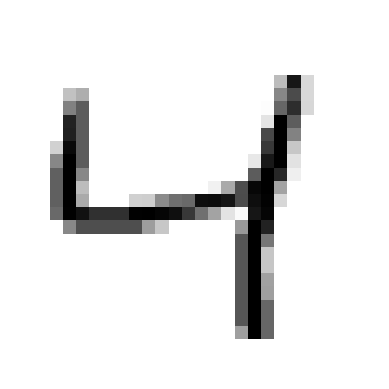

In [34]:
import matplotlib.pyplot as plt

def plot_digit(X):
  X=X.reshape(28,28)
  plt.imshow(X,cmap='binary') #binary->ağ-qara göstərir
  plt.axis('off')

plot_digit(X[2])

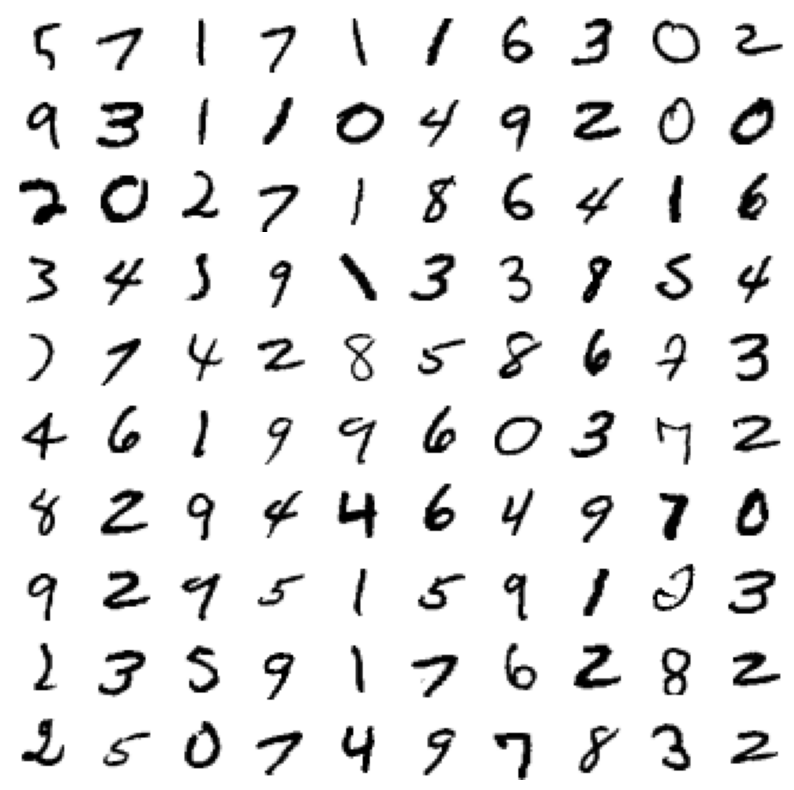

In [36]:
plt.figure(figsize=(10,10))
for idx,image in enumerate(X[100:200]): #100-200 aralığındakı sətirlər-Rows between 100 and 200
  plt.subplot(10,10,idx+1)
  plot_digit(image)

In [37]:
print(y[100:110]) #bu şəkildə olan rəqəmləri görmək üçün--to see the numbers in the picture

['5' '7' '1' '7' '1' '1' '6' '3' '0' '2']


In [47]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [49]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [50]:
#statistic gradient descent clasifier

from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.score(X_test,y_test_5)

0.9492

In [55]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [51]:
sgd_clf.predict([X[0]])

array([ True])

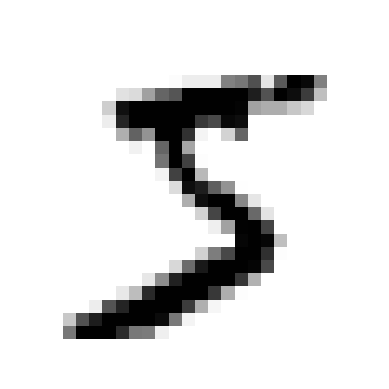

In [52]:
plot_digit(X[0])

In [56]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [57]:
import pandas as pd
pd.Series(y_train_5).value_counts()/len(y_train_5)

,count
False,0.90965
True,0.09035


In [60]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [62]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

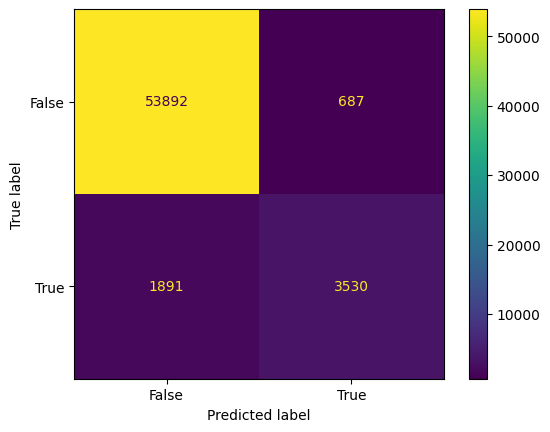

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_5,y_train_pred)
plt.show()

In [65]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_train_5,y_train_pred) #modelin 5 dəyəri verdikləri nə qədər doğrudur -- How accurate is the model's 5 values?

0.8370879772350012

In [66]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [68]:
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [67]:
cm[1,1]/(cm[0,1]) #TP/TP+FN (recall)

np.float64(5.138282387190684)

In [69]:
cm[1,1]/(cm[1,1]+cm[0,1]) #TP/TP+FP(precision)

np.float64(0.8370879772350012)

In [70]:
#Modelin düzgünlük ehtimalı--Model accuracy probability
sgd_clf.decision_function(X_train[[0]])

array([2164.22030239])

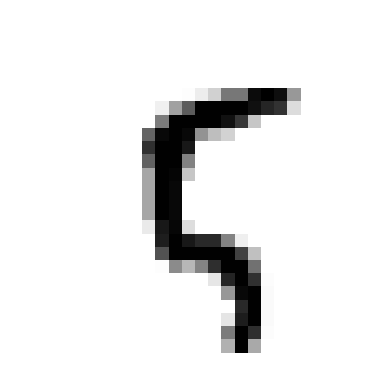

In [71]:
plot_digit(X_train[100])

In [72]:
sgd_clf.decision_function(X_train[[100]])

array([1854.68328897])

In [73]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [74]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

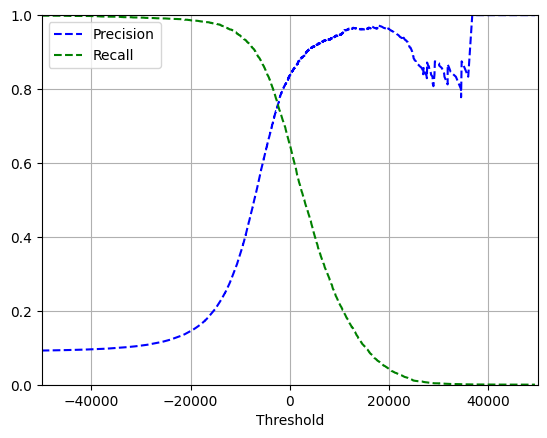

In [77]:
plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
plt.plot(thresholds,recalls[:-1],"g--",label='Recall')
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.axis([-50000,50000,0,1])
plt.grid()
plt.show()